<a href="https://colab.research.google.com/github/bhavik-knight/sentiment-analysis-dns/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Tweets

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# reference: https://plotly.com/python/pie-charts/
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

## Data Loading

### task 1
---
Dataset: tweets.csv

In [ ]:
uploaded = files.upload()

Saving tweets.csv to tweets (2).csv


In [ ]:
tweet_df = pd.read_csv("tweets.csv")
# to check if it is loaded correctly
display(tweet_df)

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27


### task 2
---
Check last 10 rows

In [ ]:
tweet_df.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


## Data cleaning

In [ ]:
# checking for null values if any
tweet_df.isna().sum()

Tweets      0
Retweets    0
Likes       0
Date        0
dtype: int64

### task 3
---
remove hyperlinks


In [ ]:
import re
def remove_hyperlinks(text):
    return re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?\S?#]*", "", text)

# test
# 3rd tweet has URL that is removed
tweet_list = tweet_df["Tweets"]
print("Before removing URLs")
print(tweet_list.iloc[2]) # to show that this particular tweet had url which was removed

print("\nAfter removing URLs")
# reference: https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
tweet_list = list(map(remove_hyperlinks, tweet_list))
print(tweet_list[2])

Before removing URLs
Dear Twitter Advertisers https://t.co/GMwHmInPAS

After removing URLs
Dear Twitter Advertisers 


### task 4
---
remove stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # for stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

# test
# print("After removing stop words")
tweet_list = list(map(remove_stopwords, tweet_list))
# print(tweet_list)

### task 5
---
remove mentions (@ and the word after it)

In [ ]:
def remove_mentions(text):
    return re.sub("@\S+", "", text)

# test
print(f"before: {tweet_list[:2]}")
tweet_list = list(map(remove_mentions, tweet_list))
print(f"after: {tweet_list[:2]}")

before: ['@PeterSchiff 🤣 thanks', '@ZubyMusic Absolutely']
after: [' 🤣 thanks', ' Absolutely']


### task 6
---
remove # but not the word after it

In [ ]:
def remove_hashtag(text):
    return re.sub("#", "", text)

# test
print(f"Before removing hashtag: {tweet_list[2848]}")


tweet_list = list(map(remove_hashtag, tweet_list))
print(f"After removing hashtag {tweet_list[2848]}")

Before removing hashtag:  #teamhumanity
After removing hashtag  teamhumanity


### task7
---
remove punctuations

In [ ]:
import string
def remove_punctuations(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# test
print(f"before: {tweet_list[-1]}")
tweet_list = list(map(remove_punctuations, tweet_list))
print(f"after: {tweet_list[-1]}")

before: CB radios free govt/media control
after: CB radios free govtmedia control


### task8
---
remove the word RT
- The RT can be paRT of a word, did you see what I mean? we shouldn't remove paRT in that case
- RT can be at the beginning, middle or end of the text
- e.g. `RT @villanelle, What amazing pieces of ARTS, adding to the CART. Who's RT the ARTIST? @evepolastri? RT`
- should remove `RT` word at the beginning, middle and end
- but **not** character in the words
    - beginning `ARTIST`
    - middle `ARTS`
    - end `CART`


In [ ]:
def remove_RT(text):
    return re.sub("^RT|\s+RT\s+|RT$", " ", text)

# test
example = "RT @villanelle, What amazing pieces of ARTS, adding to the CART. Who's RT the ARTIST? @evepolastri? RT"
print(remove_RT(example))

tweet_list = list(map(remove_RT, tweet_list))
# print(tweet_list)

  @villanelle, What amazing pieces of ARTS, adding to the CART. Who's the ARTIST? @evepolastri?  


### task9
---
remove emojis

In [ ]:
def remove_emojis(text):
    # encode the text from unicode into ascii format
    encoded = text.encode(encoding="ascii", errors="ignore")
    # decode back to unicode from ascii format
    return encoded.decode()

# test
print(f"before: {tweet_list[0]}")
tweet_list = list(map(remove_emojis, tweet_list))
print(f"after: {tweet_list[0]}")

before:  🤣 thanks
after:   thanks


### task10
---
remove leading, trailing whitespaces
- in addition, I am also removing extra white spaces between the words
- for example: `"    I am trying      to     remove exrta   spaces    "`
- should return: `"I am trying to remove extra spaces"`

In [ ]:
def remove_whitespaces(text):
    return " ".join(word.strip() for word in text.split())

# test
tweet_list = list(map(remove_whitespaces, tweet_list))
# print(tweet_list)

### task11
---
- apply lemmatization on each word \-> convert word to its root form in a meaningful way
- reference: https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658#add0
- reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- reference: https://realpython.com/nltk-nlp-python/

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("wordnet") # for lemmatization
nltk.download("punkt") # because it gave error, and asked to download
nltk.download("averaged_perceptron_tagger") # same as above

# lemmatization helper dict for position_tag conversion to feed into lemmatize function
# it will be helpful for lemmatizing differente kind of words like: adverbs, nouns, verbs, adjectives, etc
position_tags = {"JJ": "a", "NN": "n", "RB": "r", "VB": "v"}

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def apply_lemmatization(text: str):
    # dict: word(str) -> position_tag(str)
    words_pos_dict = dict()

    # do for each word of the text
    # tokenize the text and give position tag for each tokens
    for word, p_tag in nltk.pos_tag(word_tokenize(text)):
        # storing first 2 of position tags for lemmatization later
        # convert each word into lowercase - case normalization - because that's what we didn't do until now
        words_pos_dict[word] = p_tag[:2]

    result = list()
    for word, position in words_pos_dict.items():
        if position in position_tags:
            # if word if one of the adverbs, noun, verb, adjective
            # use that position parameter to lemmatize to give more meaning to the word
            new_word = WordNetLemmatizer().lemmatize(word, pos=position_tags.get(position))
        else:
            # normally lemmatize every other kind of word
            new_word = WordNetLemmatizer().lemmatize(word)

        result.append(new_word)
    return " ".join(result)

# # shorter version but didn'work well - that is common for all kind of words
# def apply_lemmatization(text: str):
#     result = WordNetLemmatizer().lemmatize(text)
#     return result

# test
t = "Those want Putin removed laboring misapprehension whoever replaces amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics"
print(f"Original:\t{t}")
print(f"Lemmatized:\t{apply_lemmatization(t)}")

# test 2
tweet_list = list(map(apply_lemmatization, tweet_list))
# print(tweet_list)

Original:	Those want Putin removed laboring misapprehension whoever replaces amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics
Lemmatized:	Those want Putin remove labor misapprehension whoever replace amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics


### task12
---
store cleaned tweet in a new column called `tweet_cleaned`

In [ ]:
def clean_data(data):
    data = remove_hyperlinks(data)
    data = remove_stopwords(data)
    data = remove_mentions(data)
    data = remove_hashtag(data)
    data = remove_punctuations(data)
    data = remove_RT(data)
    data = remove_emojis(data)
    data = remove_whitespaces(data)
    data = apply_lemmatization(data)

    # I don't know why case normalization was nto asked but I am doing for complete analysis here
    data = "".join(map(lambda x: x.lower(), data))

    return data

tweet_df["tweet_cleaned"] = tweet_df["Tweets"].map(clean_data)
display(tweet_df)

,Tweets,Retweets,Likes,Date,tweet_cleaned
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today
...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just manganese alternative iron amp phosphorus...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policy directly responsible outrageously ...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you vote office


## Sentiment Analysis

### task13
---
a. Why would / would not manual annote whole dataset?
- I wouldn't do manual annotation
- Manual annotation is a time-consuming process.
- Prone to error because of being manual
- Personal-bias may play a role in case of manual annotation

b. Alternate way?
- `Automatic annotation` by writing a procedure or code to handle the task
- Automation can be faster, unbiased and produce the least amount of errors.
- We can use some library or package to help with this process

In [ ]:
from textblob import TextBlob

# create a function to get the polarity of the text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# text = "The movie was not just good, it was mindblowing!"
# print(get_polarity(text))
tweet_df["Polarity"] = tweet_df["tweet_cleaned"].map(get_polarity)
tweet_df.head()

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.20
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today,0.35


### task14
---
add `sentiment` column for polarity:
`sentiment` = positive: if polarity > 0, negative: if polarity < 0, neutral: polarity = 0






In [ ]:
# function to map the polarity to sentiment
def get_sentiment(polarity_value):
    if polarity_value > 0:
        return "positive"
    elif polarity_value < 0:
        return "negative"
    else:
        return "neutral"

tweet_df["Sentiment"] = tweet_df["Polarity"].map(get_sentiment)
tweet_df.head()

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.20,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00,neutral
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today,0.35,positive


### task15
---
how sentiment is distributed in the dataset

In [ ]:
sentiment_grouped = tweet_df.groupby("Sentiment")
sentiment_groupby_count = sentiment_grouped\
                            .count()["Tweets"]\
                            .reset_index()\
                            .rename(columns={"Tweets": "Sentiment_count"})\
                            .sort_values(by = "Sentiment_count", ascending = False)

display(sentiment_groupby_count)

,Sentiment,Sentiment_count
1,neutral,1490
2,positive,1193
0,negative,377


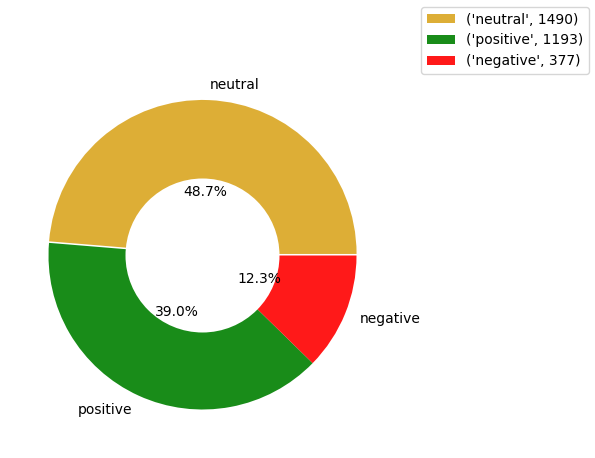

In [ ]:
# import library for plotting
figure, plot = plt.subplots(figsize = (8, 5))

figure_labels = dict(zip(sentiment_groupby_count["Sentiment"], sentiment_groupby_count["Sentiment_count"]))

plot = plt.pie(
    x = sentiment_groupby_count["Sentiment_count"],
    labels = figure_labels,
    autopct = "%1.1f%%",
    explode = [0.01, 0, 0],
    colors = ["goldenrod", "green", "red"],
    labeldistance = 1.1,
    pctdistance = 0.4,
    wedgeprops = {"alpha": 0.90},
    textprops = {"color": "black"},
)

# to draw a white circle in the middle
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)
figure.legend(figure_labels.items(), loc = "upper right")

plt.show()

#### comment
----
from the plot results, I can see that `almost half of the tweets are netural` (~49%) and that is the `highest amongst all sentiments`, followed by `positive tweets rougly 40%` compared to a very low `negative tweets roughly 10%`.

### task16
---
a. `10` most common words for each sentiment

b. use a plot to show the result above


for 10 most common words - doing TF-IDF analysis for this, but is this the way to do it?<br>
~~the higher TF-IDF number, more significant the word is;
should we look for 10 less significant words? Lower TF-IDF?~~

- Just counting the word frequency instead of doing whole TF-IDF
- Actually I did TF-IDF analysis, but doesn't make sense when I have to find just most common words.
- In the contrary, if I had to find most significant words of a particular document then it would make more sense that I did TF-IDF. (I deleted that part)


- this make sense for most common words reference:<br>
 https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# create a list of unique stop words (aka set)
stopwords = set(STOPWORDS)

- since some words appeared on the wordcloud in the sentiment doesnt make sense
- update the list of stopwords to do a meaningful analysis
- `amp` was one of the words (&amp; after removing some symbols, doesn't mean much for the analysis)
- using several trials to update the list of stopwords to make sense
- `tesla`, `starlink`, `spacex` (since Elon bought twitter, it could easily be overused - lose significance)
- some words (e.g. much) appears on both word clouds positive and negative - could be used in wrong context
- some words (e.g. yes, yeah, yup) appears in neutral word cloud but are indeed positive words; could be wrong context
---
updates: doing this manually was so time consuming, I came up with different idea
- update the stopwords until all 3 clouds for most popular words have distinct words
- meaning - intersection of all 3 clouds for most popular words is empty
- if a common word is found, update stopwords list
- how does that sound??

In [ ]:
stopwords.update([
    "amp", "tesla", "twitter", "starlink", "spacex", "ye", "yes", "yeah",  "yup", "big"
])

- create a dictionary of all words mapped to the number of times they appeared in the corpus to count `word freqency`

- sorting that dictionary in the reverse order based on the `word count` and choosing first 10 words give the most common word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
count = CountVectorizer()

In [ ]:
# bookkeeping variable
common_count = -1

# because we have to do for each sentiment, we will have to pass the list of the tweets of that sentiment
def get_n_most_popular_words(sentiment:str, exclude_words = stopwords, n = 10):
    # get the list of tweets for the given sentiment
    tweet_list = sentiment_grouped.get_group(sentiment)["tweet_cleaned"]
    word_count = count.fit_transform(tweet_list)
    common_count = word_count.shape[1]
    sum_words = word_count.sum(axis=0)

    # create a list of tuple of all words: (words, frequency)
    # and return the top 10 words
    words_frequency = sorted(
        ((word, sum_words[0, index]) for word, index in count.vocabulary_.items() if word not in exclude_words),
        key = lambda x: -x[1]
    )

    return {k:v for k, v in words_frequency[:10]}

In [ ]:
def get_10_popular_by_sentiment(sentiment:str, common_count = -1):
    while common_count:
        most_common_positive_words = get_n_most_popular_words("positive")
        most_common_negative_words = get_n_most_popular_words("negative")
        most_common_neutral_words = get_n_most_popular_words("neutral")

        positive_negative = set(most_common_positive_words).intersection(most_common_negative_words)
        positive_neutral = set(most_common_positive_words).intersection(most_common_neutral_words)
        negative_neutral =  set(most_common_negative_words).intersection(most_common_neutral_words)
        common_count = len(positive_negative) + len(positive_neutral) + len(negative_neutral)

        if common_count:
            stopwords.update(list(positive_negative))
            stopwords.update(list(positive_neutral))
            stopwords.update(list(negative_neutral))
        else:
            break

    if sentiment == "positive":
        return most_common_positive_words.keys()
    elif sentiment == "negative":
        return most_common_negative_words.keys()
    else:
        return most_common_neutral_words.keys()

print(f"popular positive words: {get_10_popular_by_sentiment('positive')}")
print(f"popular negative words: {get_10_popular_by_sentiment('negative')}")
print(f"popular neutral words: {get_10_popular_by_sentiment('neutral')}")

popular positive words: dict_keys(['good', 'true', 'great', 'many', 'exactly', 'high', 'haha', 'far', 'first', 'right'])
popular negative words: dict_keys(['hard', 'bad', 'mean', 'long', 'way', 'game', 'little', 'earth', 'still', 'less'])
popular neutral words: dict_keys(['maybe', 'next', 'think', 'probably', 'go', 'day', 'use', 'well', 'lot', 'orbit'])


generate word cloud - for each sentiment
- using a nested function to make sure that proper word cloud is generated by passing a sentiment to the function `generate_wordcloud`
- nested functions reference: https://www.freecodecamp.org/news/nested-functions-in-python/

In [ ]:
def generate_wordcloud(sentiment: str, exclude_words = stopwords):

    figure, plots = plt.subplots(ncols=2, figsize=(20, 8))

    # traditional way: fetch all words from cleaned tweets with given sentiment
    def get_words_by_sentiment(sentiment: str):
        return " ".join(sentiment_grouped.get_group(sentiment)["tweet_cleaned"])

    text = get_words_by_sentiment(sentiment)
    word_cloud0 = WordCloud(stopwords = exclude_words).generate(text)

    plots[0].imshow(word_cloud0, interpolation="bilinear")
    plots[0].axis("off")
    plots[0].set_title(f"Popular words from {sentiment} tweets")

    # most popular only
    word_cloud1 = WordCloud(stopwords = exclude_words).generate(
        " ".join(get_10_popular_by_sentiment(sentiment))
    )
    plots[1].imshow(word_cloud1, interpolation="bilinear")
    plots[1].axis("off")
    plots[1].set_title(f"The most common 10 words from {sentiment} tweets")

    plt.show()

#### positive word cloud

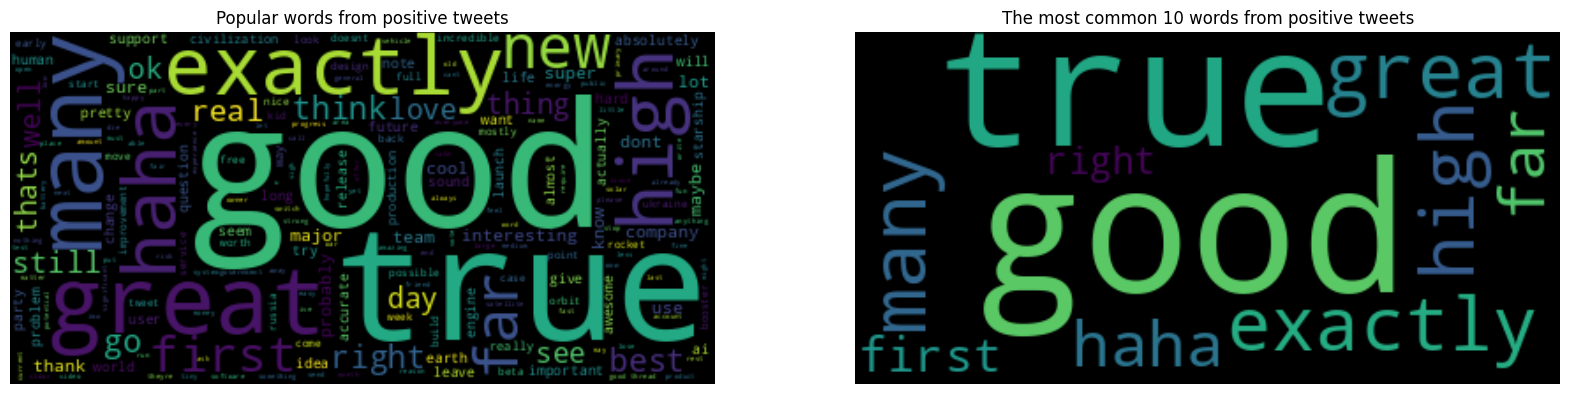

In [ ]:
generate_wordcloud("positive")

From the word cloude I conclude that most popular words for popsitive sentiments are:
1. good
2. true
3. great
4. many
5. exactly
6. haha
7. right
8. new
9. best
10. love

#### negative word cloud

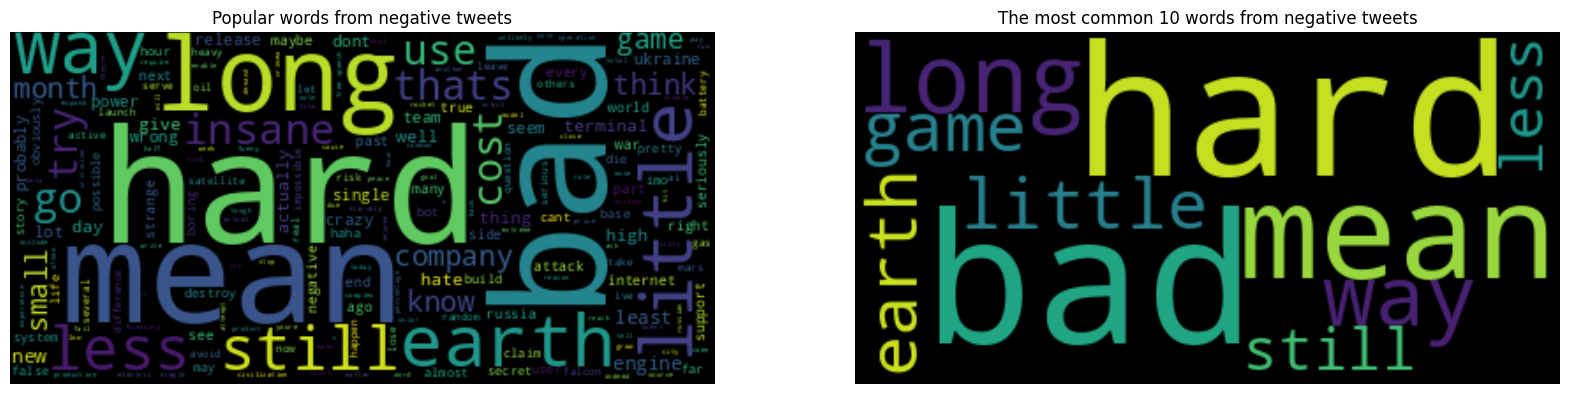

In [ ]:
generate_wordcloud("negative")

From the word cloude I conclude that most popular words for negative sentiments are:
1. bad
2. hard
3. mean
4. little
5. long
6. less
7. try
8. insane
9. use
10. way


#### neutral word cloud

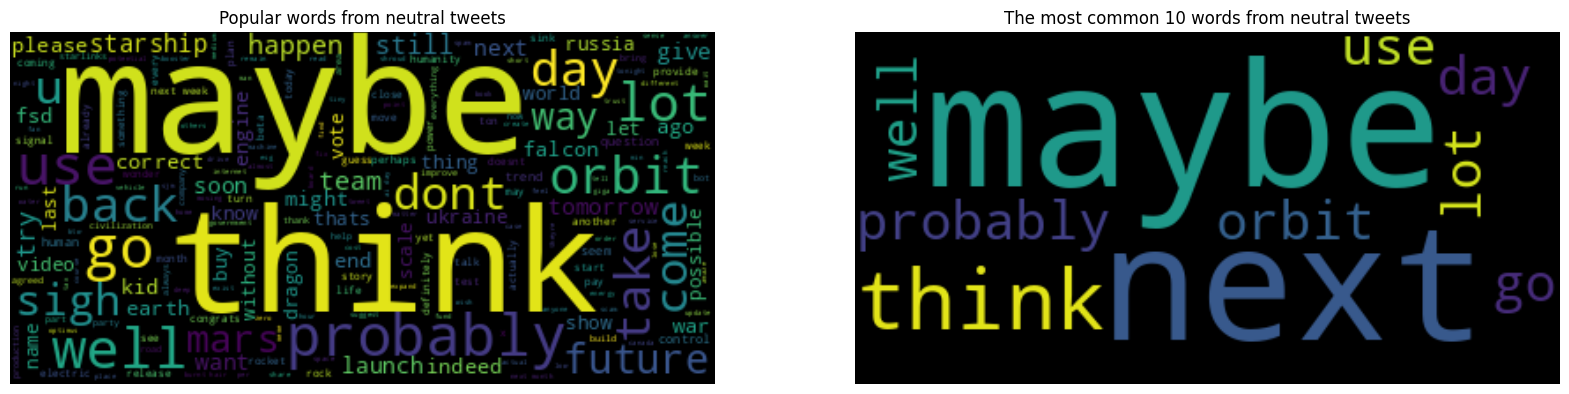

In [ ]:
generate_wordcloud("neutral")

From the word cloude I conclude that most popular words for neutral sentiments are:
1. think
2. maybe
3. probably
4. orbit
5. go
6. well
7. day
8. back
9. take
10. come

#### comments
---
The most common 10 words by `analytical method` and most popular words using the `wordcloud` are almost similar even though method varies slighly to generate both

### task17:
---
plot to show the number of likes and retweets per sentiment, comment

In [ ]:
retweets_likes_by_sentiment = sentiment_grouped.sum(numeric_only=True)\
                                .drop("Polarity", axis=1)\
                                .sort_values(by=["Likes", "Retweets"], ascending=False)\
                                .reset_index()

mean_retweets_likes_by_sentiment = sentiment_grouped\
                                    .mean(numeric_only=True)\
                                    .drop(columns = "Polarity", axis = 1)\
                                    .sort_values(by=["Likes", "Retweets"], ascending=False)\
                                    .reset_index()

retweets_likes_by_sentiment["Likes_per_retweet"] = retweets_likes_by_sentiment["Likes"] / retweets_likes_by_sentiment["Retweets"]
mean_retweets_likes_by_sentiment["Likes_per_retweet"] = mean_retweets_likes_by_sentiment["Likes"] / mean_retweets_likes_by_sentiment["Retweets"]
mean_retweets_likes_by_sentiment = mean_retweets_likes_by_sentiment\
                                        .rename(columns={
                                            "Retweets" : "Avg_retweets",
                                            "Likes": "Avg_likes",
                                            "Likes_per_retweet": "Avg_likes_per_retweet"
                                        })
display(retweets_likes_by_sentiment)
display(mean_retweets_likes_by_sentiment)

,Sentiment,Retweets,Likes,Likes_per_retweet
0,neutral,9181374,109708755,11.949056
1,positive,6288539,79253335,12.602822
2,negative,2423289,27518767,11.355958


,Sentiment,Avg_retweets,Avg_likes,Avg_likes_per_retweet
0,neutral,6161.995973,73630.036913,11.949056
1,negative,6427.822281,72994.076923,11.355958
2,positive,5271.197821,66431.965633,12.602822


#### function to create bar-chart for retweets and likes

In [ ]:
def draw_barchart(ax, data, row: int , col: int, criteria: str, is_avg=False):
    # plot for likes
    sns.barplot(
        data = data,
        x = data["Sentiment"],
        y = data[criteria],
        ax = ax[row][col],
        palette = ["goldenrod", "green", "red"],
        alpha = 0.9,
    )

    # set axis - ticks:
    # reference: https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
    ax[row][col].yaxis.set_major_formatter(ticker.EngFormatter())
    ax[row][col].set_title(f"{criteria} by sentiment")
    # put labels on bar when plotting average number of Retweets | Likes
    if is_avg:
        ax[row][col].bar_label(ax[row][col].containers[0],)

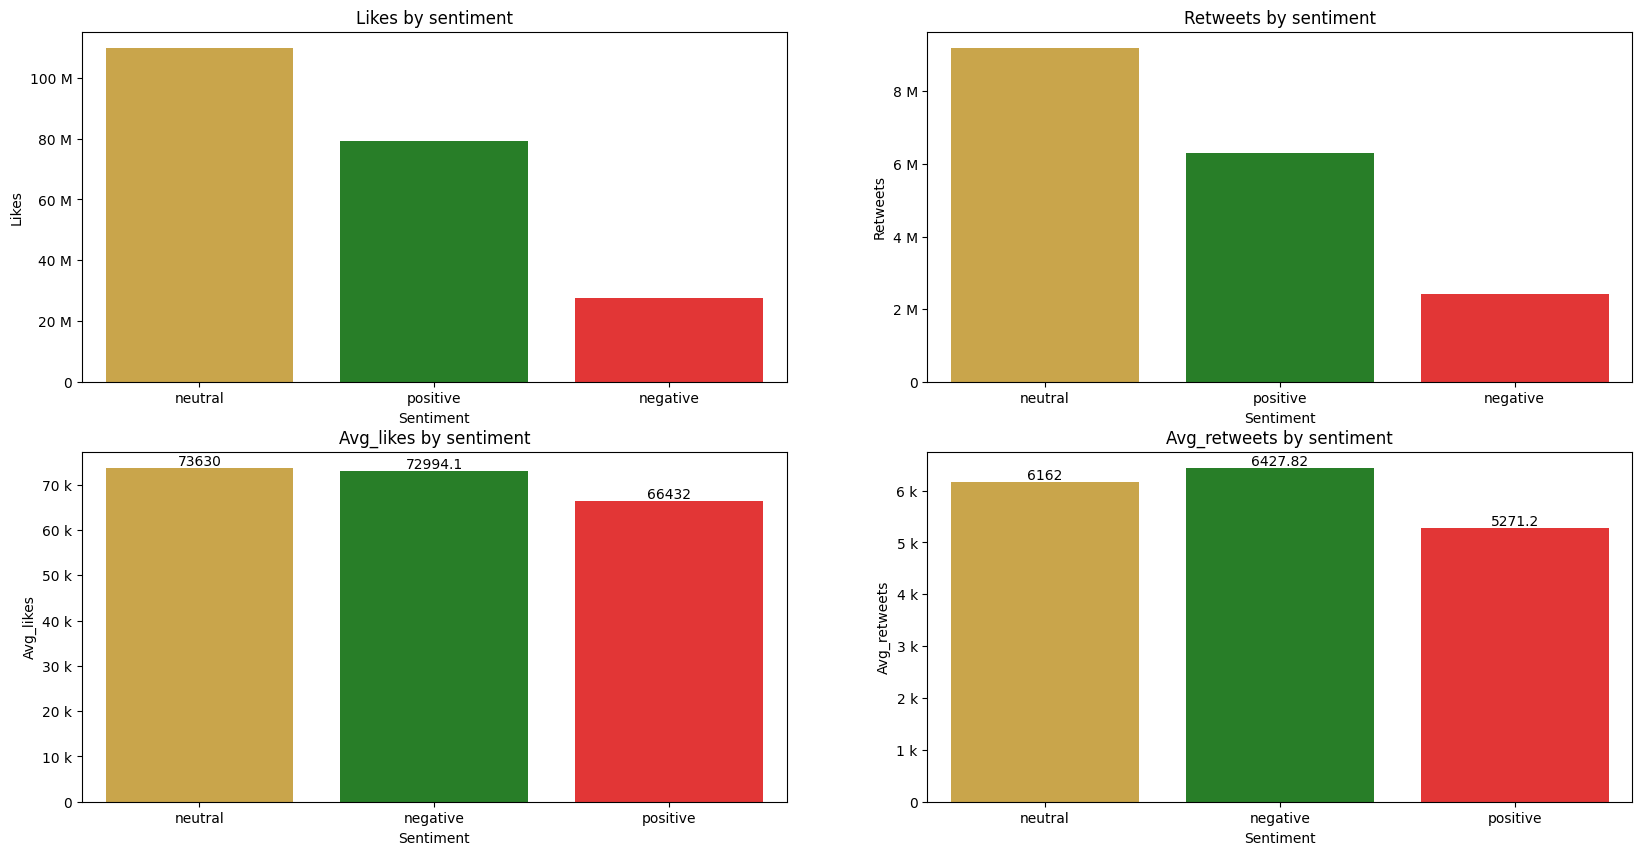

In [ ]:
figure, plots = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

# for number of likes
draw_barchart(plots, retweets_likes_by_sentiment, 0, 0, "Likes")

# for number of retweets
draw_barchart(plots, retweets_likes_by_sentiment, 0, 1, "Retweets")

# for average number of likes
draw_barchart(plots, mean_retweets_likes_by_sentiment, 1, 0, "Avg_likes", is_avg=True)

# for average number of likes
draw_barchart(plots, mean_retweets_likes_by_sentiment, 1, 1, "Avg_retweets", is_avg=True)

#### comments
----
- From the graph above I confirm that, both `number of retweets` and `number of likes` are **highest for the neutral sentiment** amongst all the sentiments.
- I can say that **number of likes are roughly `10` times more than number of retweets**
- The `average number of retweets` for `negative sentiments` is higher compared to `positive sentiment`, but only slighly higher compared to `neutral sentiment`
- however `average of likes` is highest for `neutral sentiment` that is slighltly higher to `negative sentiment`.
- For `positive sentiment` the `average engagement` (likes and retweets) is the lowest compared to `negative and neutral sentiment`.

#### Alternate way
---
showing with plotly because that is interactive - you can click the legend to toggle retweets/likes (and ticks on the axis will change automatically)

In [ ]:
# showing using bar-chart
figure0 = go.Figure()

figure0.add_trace(go.Bar(
    x = retweets_likes_by_sentiment["Sentiment"],
    y = retweets_likes_by_sentiment["Retweets"],
    name = "Retweets",
    marker = dict(color = "blue", opacity = 0.5),
))

figure0.add_trace(go.Bar(
    x = retweets_likes_by_sentiment["Sentiment"],
    y = retweets_likes_by_sentiment["Likes"],
    name = "Likes",
    marker = dict(color = "red", opacity = 0.5),
))

# Change the bar mode
figure0.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure0.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure0.update_layout({"plot_bgcolor": "white", "paper_bgcolor":"white", "barmode": "group"})
figure0.show()

In [ ]:
figure1 = go.Figure()

figure1.add_trace(go.Bar(
    x = mean_retweets_likes_by_sentiment["Sentiment"],
    y = mean_retweets_likes_by_sentiment["Avg_retweets"],
    name = "Average Retweets",
    marker = dict(color = "blue", opacity = 0.5),
))


figure1.add_trace(go.Bar(
    x = mean_retweets_likes_by_sentiment["Sentiment"],
    y = mean_retweets_likes_by_sentiment["Avg_likes"],
    name = "Average Likes",
    marker = dict(color = "red", opacity = 0.5),
))


figure1.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure1.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure1.update_layout({"plot_bgcolor": "white", "paper_bgcolor":"white"})
figure1.show()